# Normalizaton of Exponential Distributions

We'll look at the population, which is an exponential distribution, and how we may normalize it to fit our statistical models.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

**How to handle data that won't yield to either Z-score or IQR methods?**

1. Normalize: `log1p`, `sqrt`, `boxcox`, etc.
2. Remove outliers using `99th` percentile, etc.

Let's look at another dataset that has skewed `population` column, and see how we can remove outliers from it.

1. For educatonal purposes, we will first apply the Z-score method, followed by the IQR method
2. Then we will look at a third method: **log transformation then cutting from the 99th percentile**

## A. Remove outliers without normalization

In [2]:
housing = pd.read_csv('../datasets/housing/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


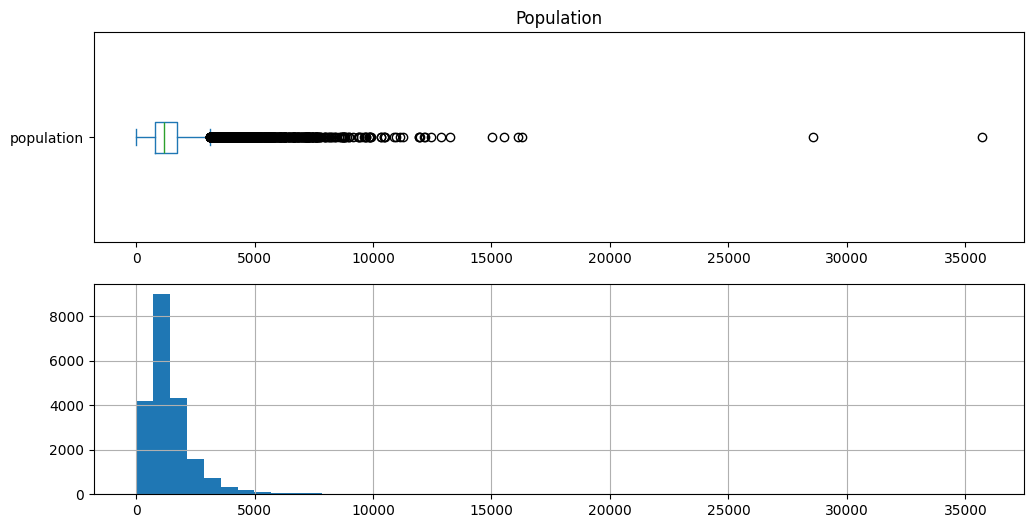

In [3]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
housing['population'].plot.box(ax=ax.flat[0], title="Population", vert=False)
housing['population'].hist(ax=ax.flat[1], bins=50);

In [6]:
def num_scale(df: pd.DataFrame, col: str) -> pd.DataFrame:
    df = df.copy()
    # let's first apply the zscore method
    threshold = 3
    housing_z = df[np.abs(stats.zscore(df[col])) <= threshold]

    # now let's apply the iqr method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    housing_iqr = df[(df[col] >= Q1 - threshold * IQR) & (df[col] <= Q3 + threshold * IQR)]
    return housing_z, housing_iqr

In [7]:
housing_z, housing_iqr = num_scale(housing, 'population')

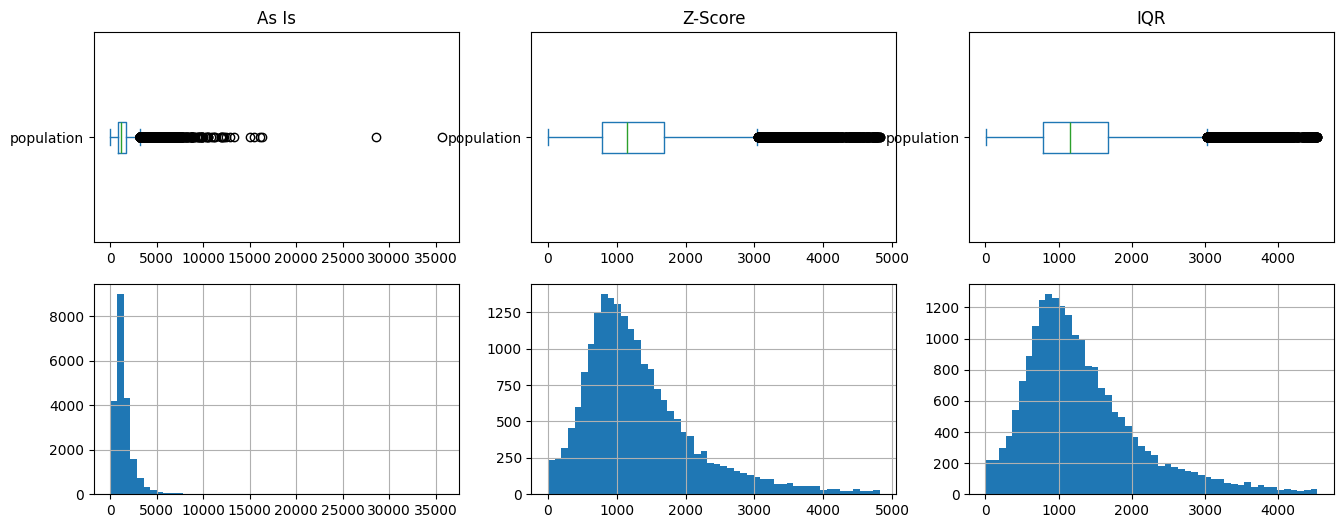

In [8]:
fig, ax = plt.subplots(2, 3, figsize=(16, 6))

# box plot
housing['population'].plot.box(ax=ax.flat[0], title="As Is", vert=False);
housing_z['population'].plot.box(ax=ax.flat[1], title="Z-Score", vert=False);
housing_iqr['population'].plot.box(ax=ax.flat[2], title="IQR", vert=False);

# histogram
housing['population'].hist(ax=ax.flat[3], bins=50);
housing_z['population'].hist(ax=ax.flat[4], bins=50);
housing_iqr['population'].hist(ax=ax.flat[5], bins=50);

## B. Normalize then remove outliers

We will now normalize and then apply the 99-percentile method, to compare the results with the previous ones.

In [10]:
log_population = np.log1p(housing['population'])
# note log1p is used to avoid log(0) which is undefined

# let's then cutoff at the 99th percentile
housing['population_norm'] = log_population
housing['population_norm_99'] = log_population[log_population < log_population.quantile(0.99)]

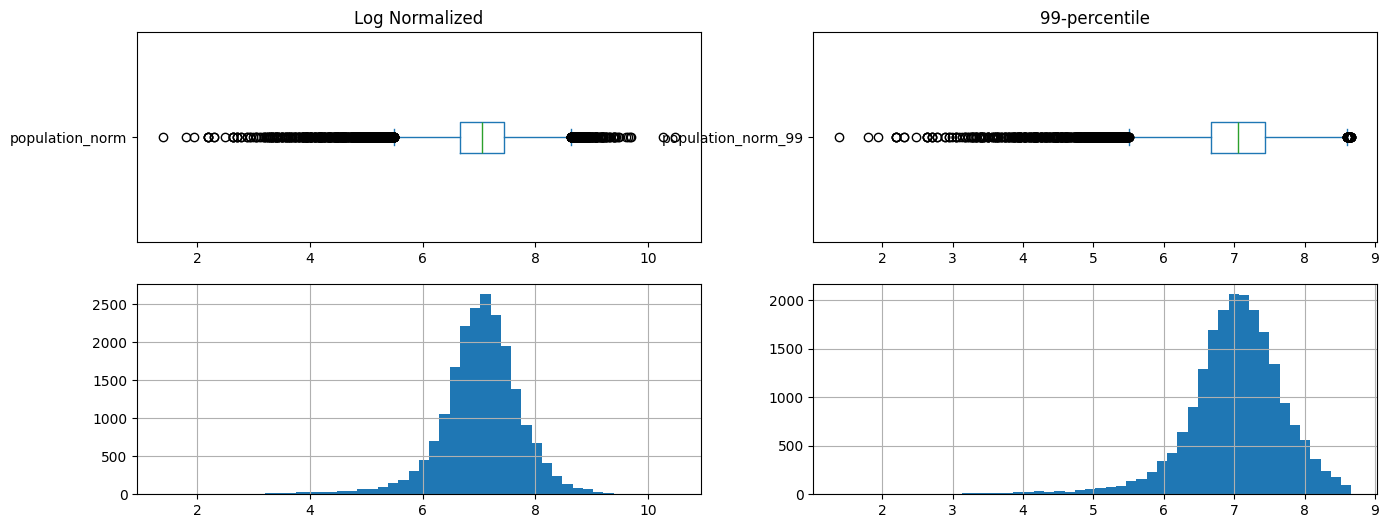

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(16, 6))

# box plot
housing['population_norm'].plot.box(ax=ax.flat[0], title="Log Normalized", vert=False);
housing['population_norm_99'].plot.box(ax=ax.flat[1], title="99-percentile", vert=False);

# histogram
housing['population_norm'].hist(ax=ax.flat[2], bins=50);
housing['population_norm_99'].hist(ax=ax.flat[3], bins=50);